In [7]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

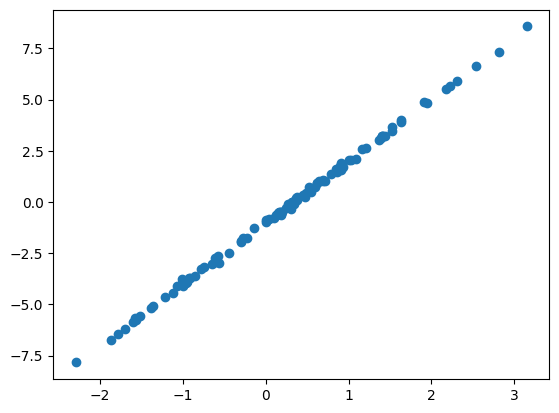

In [8]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [9]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 3.01, b: -1.00


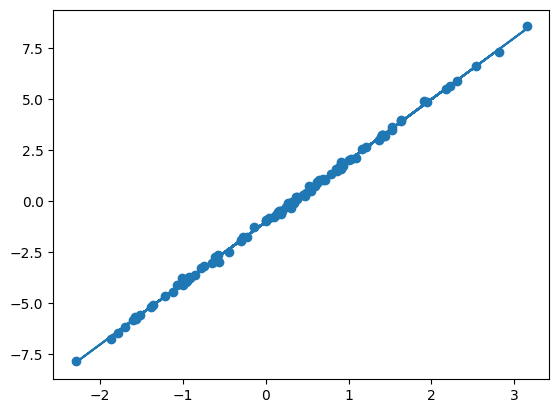

In [10]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

In [58]:
def hardCore(r):
    eps = 1e-2
    return jnp.where(r>0.2, 0, -1/jnp.exp(r/eps))
    # if r < 0.1:
    #     return 1/jnp.exp(r/eps)
    # else:
    #     return 0

29 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


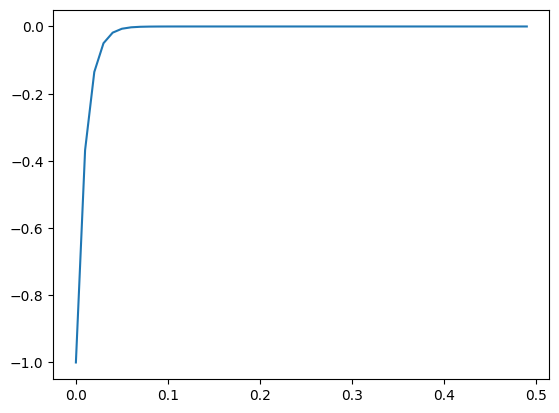

In [59]:
x = jnp.arange(0,0.5,0.01)
%timeit hardCore(x).block_until_ready()
plt.plot(x,hardCore(x))

In [60]:
hCore_jit = jax.jit(hardCore)
# Warm up
hCore_jit(x).block_until_ready()

%timeit hCore_jit(x).block_until_ready()

4.35 µs ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


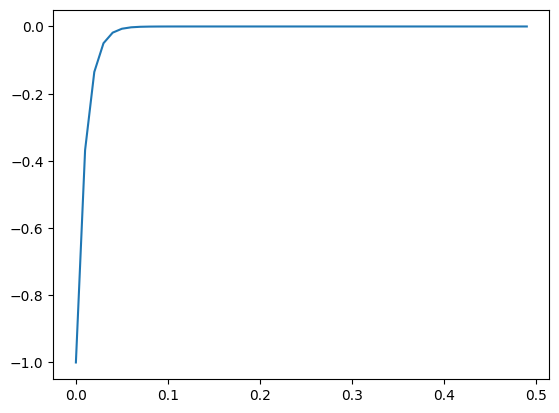

In [61]:
plt.plot(x,hardCore(x))

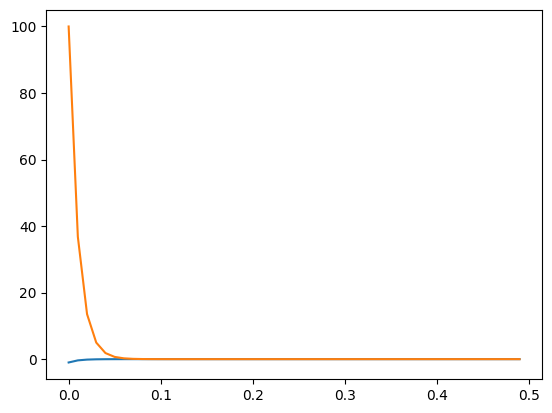

In [64]:
hCgrad = jax.grad(hardCore)
hCgradVec = jax.vmap(hCgrad)
plt.plot(x,hardCore(x))
plt.plot(x,hCgradVec(x))

In [67]:
from jax import random

key = random.PRNGKey(42)

print(key)

[ 0 42]


In [77]:
key, subkey = random.split(key)
print(key)

[3293111712  223174505]


419 µs ± 9.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(array([  1.,   0.,   0.,   1.,   1.,   0.,   3.,   6.,   2.,   4.,   8.,
          3.,  10.,   7.,   9.,  14.,  21.,  19.,  22.,  25.,  33.,  34.,
         40.,  51.,  56.,  75.,  61.,  91.,  82., 111., 132., 139., 129.,
        151., 164., 175., 199., 210., 220., 269., 237., 264., 264., 266.,
        283., 303., 299., 298., 271., 308., 316., 289., 257., 271., 259.,
        265., 264., 255., 217., 219., 175., 212., 197., 155., 147., 128.,
        130., 126.,  95.,  83.,  76.,  73.,  61.,  50.,  45.,  43.,  38.,
         28.,  29.,  25.,  19.,  18.,  20.,   9.,   5.,   4.,   6.,   3.,
          5.,   1.,   1.,   1.,   2.,   4.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([-3.69009686, -3.61464262, -3.53918862, -3.46373439, -3.38828039,
        -3.31282616, -3.23737216, -3.16191792, -3.08646393, -3.01100969,
        -2.93555546, -2.86010146, -2.78464723, -2.70919323, -2.63373899,
        -2.558285  , -2.48283076, -2.40737653, -2.33192253, -2.2564683 ,
        -2.1810143 , -2.10

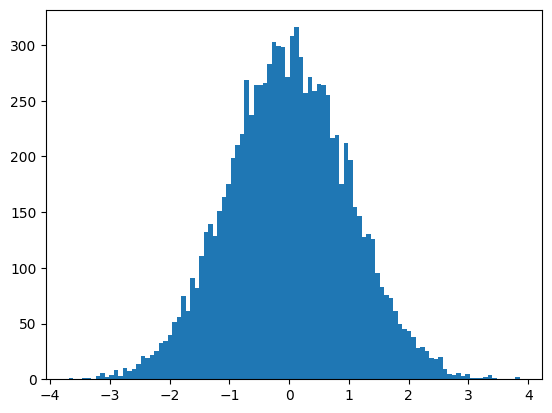

In [84]:
key = random.PRNGKey(42)
%timeit x = random.normal(key, shape=(10000,))
plt.hist(x, bins=100)